8.

a)

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.animation as animation
from tqdm import tqdm


Nt = 1000
Nx = 50

x = np.linspace(0.,1.,Nx)
t = np.linspace(0.,10.,Nt)

dt = t[1] - t[0]
dx = x[1] - x[0]

k=0.01
lam = k*dt/(dx**2)
print(lam)

0.2403403403403404


b)

In [6]:
def ui(x):
    return np.random.rand()*0.3

def wi(x):
    return 0

def initT():
    u = np.zeros((Nt,Nx))
    u[0,:] =ui(x)
    u[:,0] = 0.1
    u[:,-1] = 0.2

    w = np.zeros((Nt,Nx))
    w[0,:] = wi(x)

    return u, w

u,w = initT()

def getSolution():

    for l in tqdm(range(1,len(t))):
        if l == 1:
            u[l,:] = u[l-1,:]
            w[l,:] = w[l-1, :]
        else:
            for i in range(1,len(x)-1):
                u[l,i] = (1-2*lam)*u[l-1,i]+lam*(u[l-1,i+1] + u[l-1,i-2]) - u[l-1,i]*(u[l-1,i]-0.2)*(1-u[l-1,i]) + w[l-1,i]
                w[l,i] = (0.03*dt)*(u[l-1,i]-0.3*w[l-1,i]) + w[l-1,i]


getSolution()

print(u)



 86%|█████████████████████████████████▋     | 864/999 [00:00<00:00, 3800.28it/s]/var/folders/4t/bxy3v5dd0b7_yz2541rxp_wr0000gn/T/ipykernel_9009/327201656.py:28: RuntimeWarning: overflow encountered in scalar multiply
  u[l,i] = (1-2*lam)*u[l-1,i]+lam*(u[l-1,i+1] + u[l-1,i-2]) - u[l-1,i]*(u[l-1,i]-0.2)*(1-u[l-1,i]) + w[l-1,i]
100%|███████████████████████████████████████| 999/999 [00:00<00:00, 3612.20it/s]

[[1.00000000e-01 1.96454959e-01 1.96454959e-01 ... 1.96454959e-01
  1.96454959e-01 2.00000000e-01]
 [1.00000000e-01 1.96454959e-01 1.96454959e-01 ... 1.96454959e-01
  1.96454959e-01 2.00000000e-01]
 [1.00000000e-01 1.97866597e-01 1.73832563e-01 ... 1.97014581e-01
  1.97866597e-01 2.00000000e-01]
 ...
 [1.00000000e-01 3.62433442e-01 3.61460336e-01 ... 9.33603934e+00
  1.22200532e+00 2.00000000e-01]
 [1.00000000e-01 3.62651889e-01 3.61724551e-01 ... 7.27905367e+04
  1.10503115e+02 2.00000000e-01]
 [1.00000000e-01 3.62870488e-01 3.61989058e-01 ... 8.11027157e+16
  1.16116097e+09 2.00000000e-01]]


e)

<IPython.core.display.Javascript object>


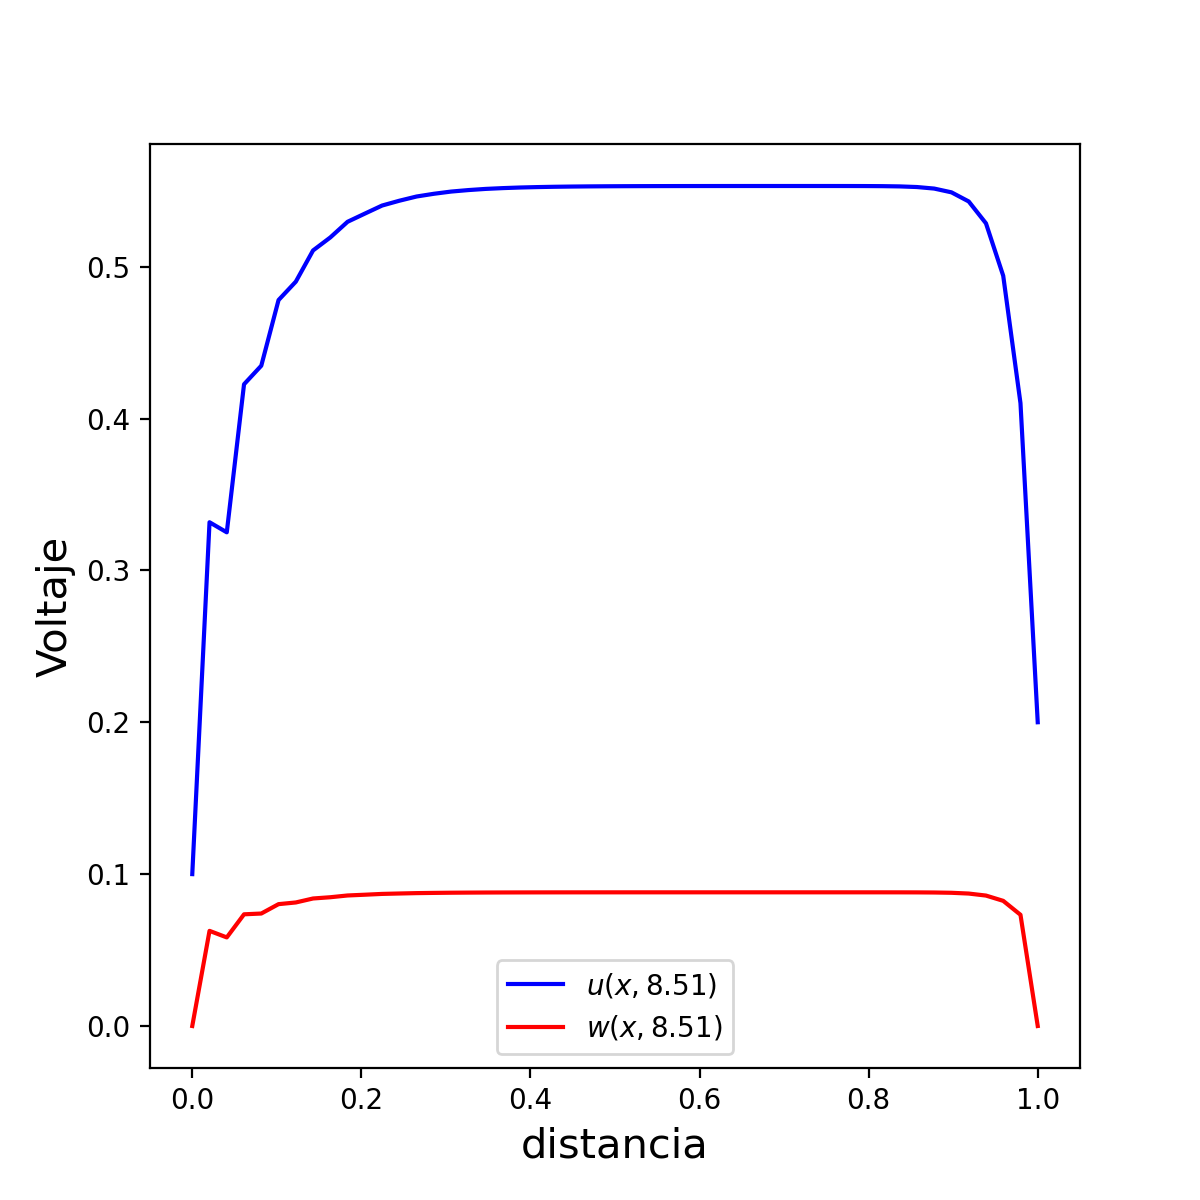

In [7]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
    
def Update(i):
    plot = ax.clear()
    ax.set_xlabel("distancia", fontsize=15)
    ax.set_ylabel("Voltaje", fontsize=15) 
    plot = ax.plot(x,u[i,:] ,color='blue', label=r'$u(x,%.2f)$' %(t[i]))
    plot = ax.plot(x,w[i,:] ,color='red', label=r'$w(x,%.2f)$' %(t[i]))
    plot = plt.legend(loc=0)
    return plot

Animation = animation.FuncAnimation(fig, Update, frames=len(t), init_func=init)